# Writeup Camera Calibration

Student: Martin Weissmann

10.05.2019

## Types of Distortion

Real cameras use curved lenses to form an image, and light rays often bend a little too much or too little at the edges of these lenses. This creates an effect that distorts the edges of images, so that lines or objects appear more or less curved than they actually are. This is called radial distortion, and it’s the most common type of distortion.

Another type of distortion, is tangential distortion. This occurs when a camera’s lens is not aligned perfectly parallel to the imaging plane, where the camera film or sensor is. This makes an image look tilted so that some objects appear farther away or closer than they actually are.

In [2]:
%%html
<img src="Bilder Notebook/Pinhole_and_Multiple_beam.png", width=800>
<img src="Bilder Notebook/Radial_Distortion.png", width=800>


## Distortion Coefficients and Correction

There are three coefficients needed to correct for radial distortion: k1, k2, and k3. To correct the appearance of radially distorted points in an image, one can use a correction formula.

In the following equations, $(x,y)$ is a point in a distorted image. To undistort these points, OpenCV calculates r, which is the known distance between a point in an undistorted (corrected) image $(xcorrected,ycorrected)$ and the center of the image distortion, which is often the center of that image $(xc,yc)$. This center point $(xc,yc)$ is sometimes referred to as the distortion center. These points are pictured below.

Note: The distortion coefficient k3 is required to accurately reflect major radial distortion (like in wide angle lenses). However, for minor radial distortion, which most regular camera lenses have, k3 has a value close to or equal to zero and is negligible. So, in OpenCV, you can choose to ignore this coefficient; this is why it appears at the end of the distortion values array: [k1, k2, p1, p2, k3]. In this course, we will use it in all calibration calculations so that our calculations apply to a wider variety of lenses (wider, like wide angle, haha) and can correct for both minor and major radial distortion.

In [1]:
%%html
<img src="Bilder Notebook/Correction.png", width=800>

## Calculation of the Coefficients


#### Radial distortion correction:

$x_{distorted} = x_{ideal} (1 + k_1r^2 + k_2r^4 + k_3r^6)$

$y_{distorted} = y_{ideal} (1 + k_1r^2 + k_2r^4 + k_3r^6)$

#### Tangential distortion correction:

$x_{corrected} = x + [2p_1xy + p_2(r^2 + 2x^2)]$

$y_{corrected} = y + [p_1(r^2 + 2y^2) + 2p_2xy]$

## Import of the necessary modules

In [4]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle
import math
%matplotlib inline

In [11]:
def cal_camera():
    # get the images with glob
    images = glob.glob('camera_cal/*.jpg')

    # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
    # 6*8 Kästchen -> 3 steht für x,y,z
    objp = np.zeros((6*9,3), np.float32)
    objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

    # Arrays to store object points and image points from all the images.
    objpoints = []
    imgpoints = [] 
    
    # Step through the list and search for chessboard corners
    # idx = index
    for idx, fname in enumerate(images):
        img = cv2.imread(fname)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # ret = bool -> gefunden oder nicht gefunden
        # corners = Koordinaten der gefundenen Kantenpunkten
        ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

        # If found, add object points, image points
        if ret == True:
            objpoints.append(objp)
            imgpoints.append(corners)

            # Draw and display the corners
            cv2.drawChessboardCorners(img, (9,6), corners, ret)
            
            # store image
            #write_name = 'output_images/Camera_Cal/Corners_Found/9Corner/corners_found_'+str(idx)+'.jpg'
            #cv2.imwrite(write_name,img)

        else:
            print("Error -- Can't find Chessboard in Image" , fname)

    return objpoints, imgpoints

objpoints, imgpoints= cal_camera()

Error -- Can't find Chessboard in Image camera_cal/calibration1.jpg
Error -- Can't find Chessboard in Image camera_cal/calibration5.jpg
Error -- Can't find Chessboard in Image camera_cal/NEW_undist_calibration2.jpg
Error -- Can't find Chessboard in Image camera_cal/calibration4.jpg


### Plot Images of detected Corners



raw =9.0


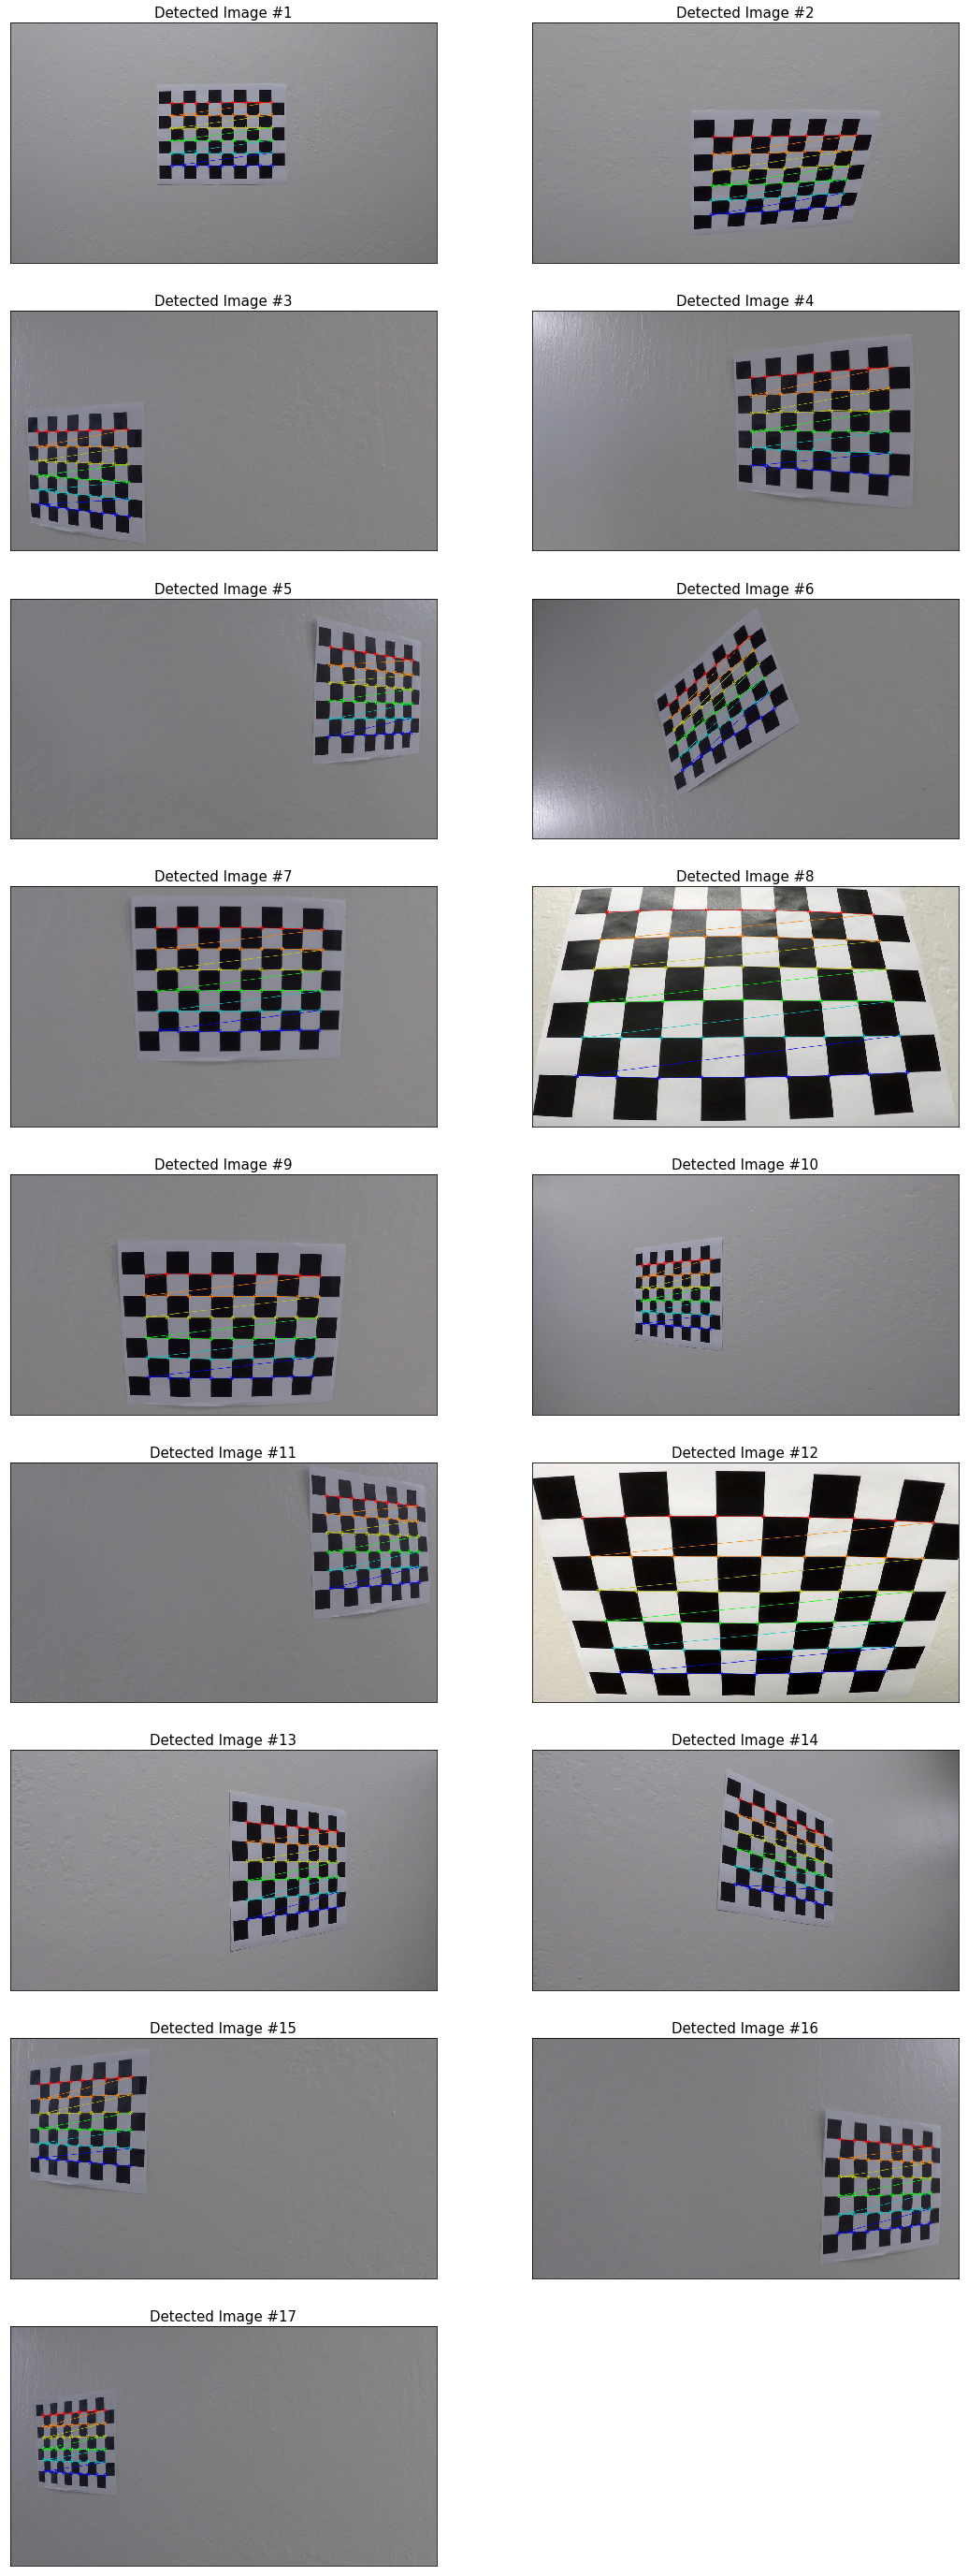

In [8]:
%matplotlib inline

def plot_n(img, title, cmap=''):
    plt.figure(figsize=(20,50))
    plt.subplots_adjust(wspace=0.001, hspace=0.2)
        
    if len(img) % 2 > 0:
        raw = (len(img)-1) / 2 + 1
        print('raw =' + str(raw))
    else:
        raw = len(img) / 2
        print('raw =' + str(raw))
        
    for i in range(len(img)):
        plt.subplot(raw, 2 , i+1)
        plt.imshow(img[i],cmap=str(cmap))
        plt.title(title[i], fontsize = 15)
        plt.xticks([])
        plt.yticks([])
    plt.show()

image_undist =  glob.glob('output_images/Camera_Cal/Corners_Found/9Corner/*.jpg')
images=[]
titels=[]
for idx, fname in enumerate(image_undist):
    img_BGR = plt.imread(fname)
    images.append(img_BGR)
    titels.append('Detected Image #' + str(idx+1))
    
plot_n(images,titels,'gray')

## Test it on Road Images and Plot them

Now we have objpoints and imgpoints needed for camera calibration. To calibrate and calculate distortion coefficients the function cv2.calibrateCamera() is used.
After calibrating the camera tests with original road images where done.



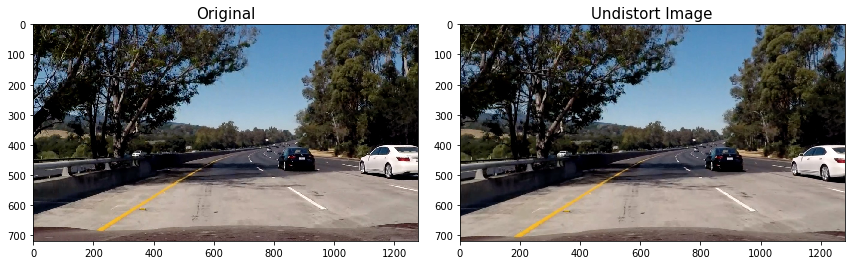

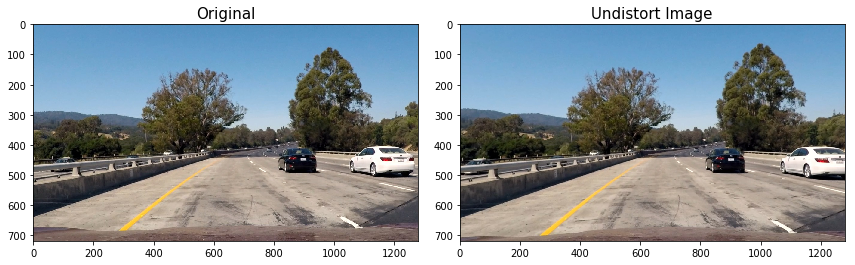

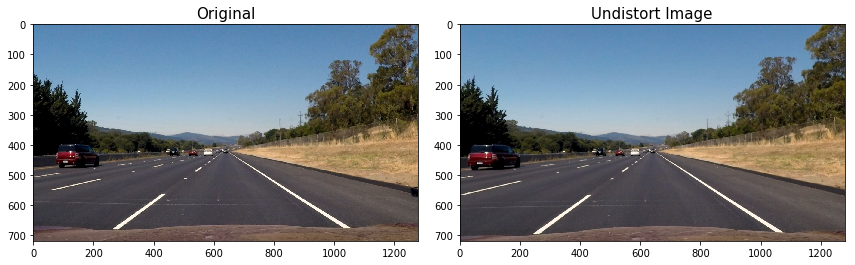

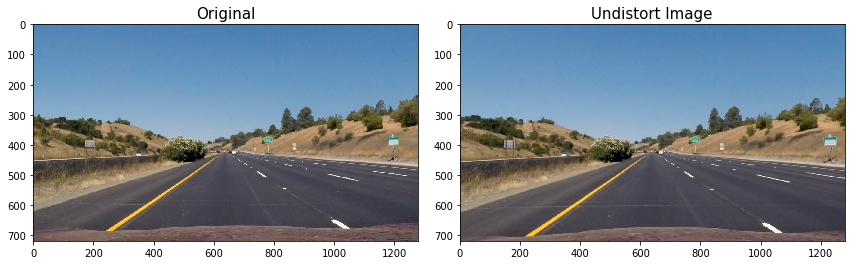

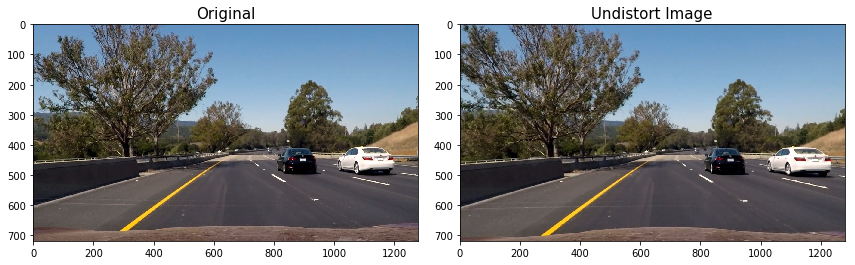

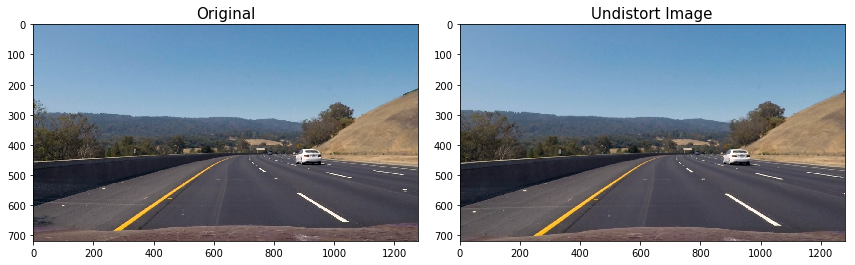

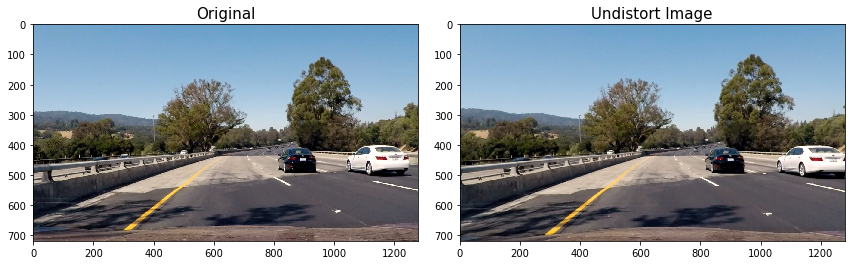

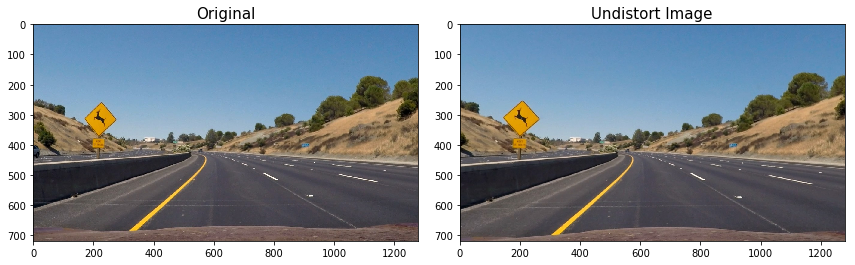

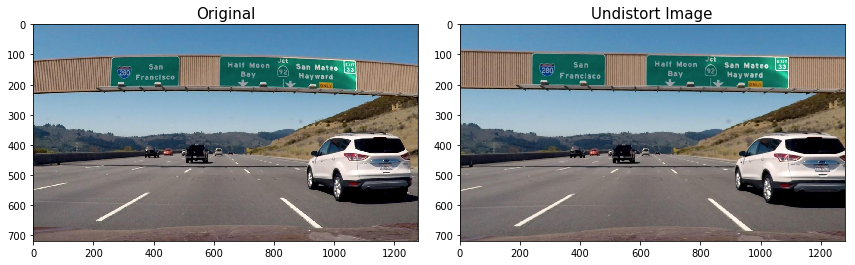

In [13]:
def cal_check_all(objectpoints, imgpoints):
    
    # Check and Display Lane Images - Original and Undistorted Images
    image_orig =  glob.glob('test_images/*.jpg')

    for idx, fname in enumerate(image_orig):
        img_BGR = cv2.imread(fname)
        img=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
        dst = cv2.undistort(img_BGR, mtx, dist, None, mtx)
        # Save the Image
        cv2.imwrite('output_images/Camera_Cal/Undistored_Img/Undistort_Road '+ str(idx) + '.png',dst)
        dst_RGB = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
        
        # Plot the Images
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
        f.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original', fontsize=15)
        ax2.imshow(dst_RGB)
        ax2.set_title('Undistort Image', fontsize=15)

    # same action for png images 
    image_orig =  glob.glob('test_images/*.png')

    for idx, fname in enumerate(image_orig):
        img_BGR = cv2.imread(fname)
        img=cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
        img_size = (img.shape[1], img.shape[0])
        ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
        dst = cv2.undistort(img_BGR, mtx, dist, None, mtx)
        # Speichern der Images
        cv2.imwrite('output_images/Camera_Cal/Undistored_Img/Undistort_Road '+ str(idx) + '.png',dst)
        dst_RGB = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))
        f.tight_layout()
        ax1.imshow(img)
        ax1.set_title('Original', fontsize=15)
        ax2.imshow(dst_RGB)
        ax2.set_title('Undistort Image', fontsize=15)

cal_check_all(objpoints, imgpoints)

## Save the calibration Values

To save the calibration Values I use the Modul "pickle".

- pickle.dump() -> save the value
- pickle.load() -> read the value


Text(0.5, 1.0, 'Entzerrtes Image')

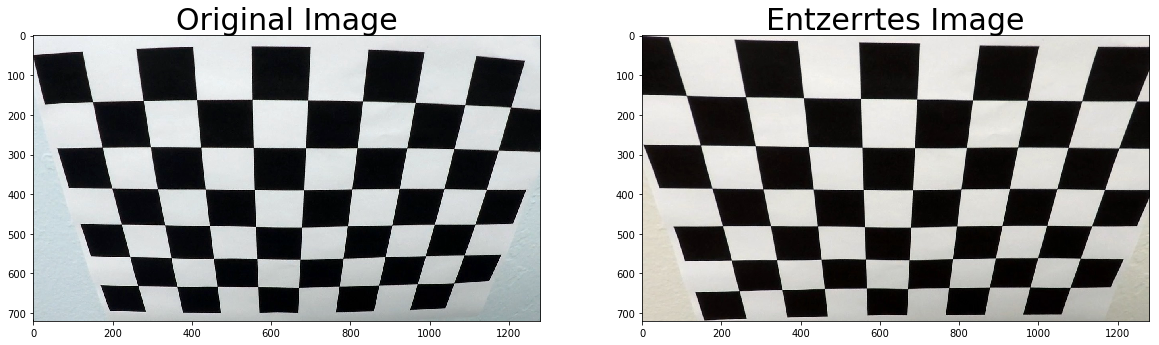

In [16]:
def cal_result_save(objpoints, imgpoints):
    # Test undistortion on an image
    img = cv2.imread('camera_cal/calibration2.jpg')
    img_size = (img.shape[1], img.shape[0])

    # Do camera calibration given object points and image points
    # mtx -> Camera Matrix
    # dist -> Distortion Coeffition
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    #cv2.imwrite('camera_cal/9Corners/NEW_undist_calibration2.jpg',dst)

    # Save the camera calibration result for later use (we won't worry about rvecs / tvecs)
    dist_pickle = {}
    dist_pickle["mtx"] = mtx
    dist_pickle["dist"] = dist
    pickle.dump(dist_pickle, open("Camera_Calib_Values/wide_dist_pickle9Corner_class.p", "wb" ) )
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    dist_pickle

    return img, dst

img, dst = cal_result_save(objpoints, imgpoints)

# Plot Images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Entzerrtes Image', fontsize=30)

## Summary

The code above is collected in a class called: Camera_Cal_Class